In [1]:
import numpy as np                   # linear algebra
import pandas as pd                  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      # Data Visualization 
import seaborn as sns                # Python library for Vidualization
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
# Import the dataset
dataset = pd.read_csv('college.csv')
dataset.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [3]:
# total rows and colums in the dataset
dataset.shape

(777, 19)

In [32]:
dataset.rename(columns= {"Unnamed: 0":"college_name"}, inplace = True)

In [36]:
dataset["Private"] = dataset["Private"].astype('category')

In [37]:
dataset.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 776
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   college_name  776 non-null    object  
 1   Private       776 non-null    category
 2   Apps          776 non-null    int64   
 3   Accept        776 non-null    int64   
 4   Enroll        776 non-null    int64   
 5   Top10perc     776 non-null    int64   
 6   Top25perc     776 non-null    int64   
 7   F.Undergrad   776 non-null    int64   
 8   P.Undergrad   776 non-null    int64   
 9   Outstate      776 non-null    int64   
 10  Room.Board    776 non-null    int64   
 11  Books         776 non-null    int64   
 12  Personal      776 non-null    int64   
 13  PhD           776 non-null    int64   
 14  Terminal      776 non-null    int64   
 15  S.F.Ratio     776 non-null    float64 
 16  perc.alumni   776 non-null    int64   
 17  Expend        776 non-null    int64   
 18  Grad.Rate 

In [6]:
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

dataset.describe().to_csv("dataset_describe.csv")
dataset.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [34]:
dataset = dataset[dataset["Grad.Rate"]<= 100]

In [8]:
dataset.describe().to_csv("dataset_describe_updated.csv")
dataset.describe()

PermissionError: [Errno 13] Permission denied: 'dataset_describe_updated.csv'

In [9]:
dataset["Private"].value_counts()

Yes    564
No     212
Name: Private, dtype: int64

In [10]:
# Missing values computation
dataset.isnull().sum()

college_name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

## EDA

In [11]:
dataset.groupby(["Private"], as_index = False).agg(app_total=pd.NamedAgg(column="Apps", aggfunc="sum"),\
                                                  acpt_total=pd.NamedAgg(column="Accept", aggfunc="sum"),\
                                                  enl_total=pd.NamedAgg(column="Enroll", aggfunc="sum"),\
                                                  outstate_total=pd.NamedAgg(column="Outstate", aggfunc="sum"),\
                                                  PhD_total=pd.NamedAgg(column="PhD", aggfunc="sum"),\
                                                  avg_expend=pd.NamedAgg(column="Expend", aggfunc="mean"),\
                                                  avg_grad_rate=pd.NamedAgg(column="Grad.Rate", aggfunc="mean"))

,Private,app_total,acpt_total,enl_total,outstate_total,PhD_total,avg_expend,avg_grad_rate
0,No,1214743,830889,347865,1444443,16289,7458.32,56.04
1,Yes,1113683,734289,257647,6658573,40146,10491.30,68.91


In [12]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
plt.figure(figsize=(16,  25))
sns.boxplot(data=df_num, orient="h", palette="Set2")

In [ ]:
# Category encoding
# dataset["Private_code"] = dataset["Private"].astype('category')
# dataset["Private_code"] = dataset.Private_code.cat.codes
# dataset[["Private","Private_code"]].drop_duplicates().reset_index(drop= True)

In [13]:
# adding a binary coded column for cross evaluation
dataset['Cluster'] = dataset['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
corr_df = df_num.drop('Cluster', axis = 1).corr()
corr_df

In [ ]:
# correlation heatmap
corr = dataset.corr()
plt.figure(figsize=(14, 12))

sns.heatmap(corr
#             [(corr >= 0.5) | (corr <= -0.4)]
            , 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.tight_layout()
plt.savefig('corr_heatmap_all.png', facecolor='w')

In [ ]:
abs(corr_df)

In [ ]:
abs(corr_df).min(axis=1)

In [ ]:
abs(corr_df).min(axis=0)

In [ ]:
abs(corr_df).idxmin()

In [ ]:
# Create the default pairplot using seaborn
g =sns.pairplot(dataset.drop('Cluster', axis=1), height =2)
for ax in g.axes.flat:
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.tight_layout()
plt.savefig('pairplot_all.png', facecolor='w')
plt.show()

In [ ]:
# dataframe creation for separate modeling techniques
dataset1 = dataset.copy()
dataset2 = dataset.copy()
dataset3 = dataset.copy()
dataset4 = dataset.copy()

# Modeling using all the variables and elbow method

In [ ]:
X = dataset.iloc[:, 2:19].values
X

In [ ]:
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
X_scaled

In [ ]:
# Building the Model
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
# to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
wcss = []

# We always assume the max number of cluster would be 10
# You can judge the number of clusters by doing averaging
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
# Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(12, 10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.tight_layout()
plt.savefig('elbow_all.png', facecolor='w')
plt.show()

In [ ]:
# unsupervised learning
kmeansmodel_unsup = KMeans(n_clusters= 5, random_state=0)
y_kmeans_unsup= kmeansmodel_unsup.fit_predict(X_scaled)

In [ ]:
dataset1.iloc[:, 2:19].columns

In [ ]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(kmeansmodel_unsup.cluster_centers_[:, 0], kmeansmodel_unsup.cluster_centers_[:, 1], s = 300, c = 'orange', zorder = 5, \
            label = 'Centroids', alpha = 1)
plt.scatter(X_scaled[y_kmeans_unsup == 0, 2], X_scaled[y_kmeans_unsup == 0, 16] , c = 'red', label = 'Cluster 1', zorder = 0,\
            alpha = .6)
plt.scatter(X_scaled[y_kmeans_unsup == 1, 2], X_scaled[y_kmeans_unsup == 1, 16], c = 'blue', label = 'Cluster 2', zorder = 1,\
           alpha = .6)
plt.scatter(X_scaled[y_kmeans_unsup == 2, 2], X_scaled[y_kmeans_unsup == 2, 16], c = 'green', label = 'Cluster 3', zorder = 2,\
           alpha = .6)
plt.scatter(X_scaled[y_kmeans_unsup == 3, 2], X_scaled[y_kmeans_unsup == 3, 16], c = 'yellow', label = 'Cluster 4', zorder = 3,\
           alpha = .8)
plt.scatter(X_scaled[y_kmeans_unsup == 4, 2], X_scaled[y_kmeans_unsup == 4, 16], c = 'pink', label = 'Cluster 5', zorder = 4,\
           alpha = .8)

plt.title('Clusters of colleges')
plt.xlabel('Enroll')
plt.ylabel('Grad.Rate')
plt.legend()
plt.tight_layout()
plt.savefig('clusters_all.png', facecolor='w')
plt.show()

In [ ]:
dataset1["Kmean_cluster"] = y_kmeans_unsup
cluster_count_df = dataset1["Kmean_cluster"].value_counts().to_frame()
cluster_count_df.reset_index(inplace= True)
cluster_count_df.rename(columns = {"index" : "Kmean_cluster", "Kmean_cluster" : "count"}, inplace = True)
cluster_count_df.sort_values("Kmean_cluster", ignore_index=True, inplace = True)
cluster_count_df

In [ ]:
# Getting counts
dataset1.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(\
            count=pd.NamedAgg(column="college_name", aggfunc="count"))

## Feature selection for the model - 2 features elbow method

In [15]:
X = dataset[['Enroll', 'Grad.Rate']].values
X

array([[ 721,   60],
       [ 512,   56],
       [ 336,   54],
       ...,
       [ 695,   49],
       [1317,   99],
       [ 691,   99]], dtype=int64)

In [16]:
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
X_scaled

array([[-0.06382192, -0.31601871],
       [-0.2887631 , -0.55029673],
       [-0.47818726, -0.66743574],
       ...,
       [-0.09180503, -0.96028327],
       [ 0.57763716,  1.96819201],
       [-0.09611012,  1.96819201]])

In [17]:
# Building the Model
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
# to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
wcss = []

# We always assume the max number of cluster would be 10
# You can judge the number of clusters by doing averaging
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


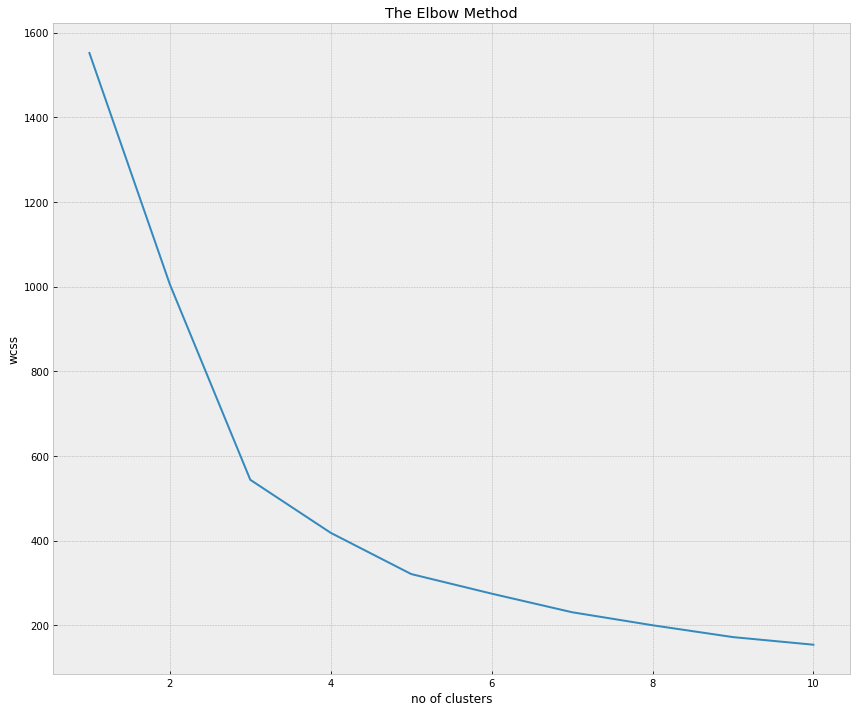

In [18]:
# Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(12, 10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.tight_layout()
plt.savefig('elbow_two.png', facecolor='w')
plt.show()

In [19]:
# unsupervised learning
kmeansmodel_unsup = KMeans(n_clusters= 5, random_state=0)
y_kmeans_unsup= kmeansmodel_unsup.fit_predict(X_scaled)

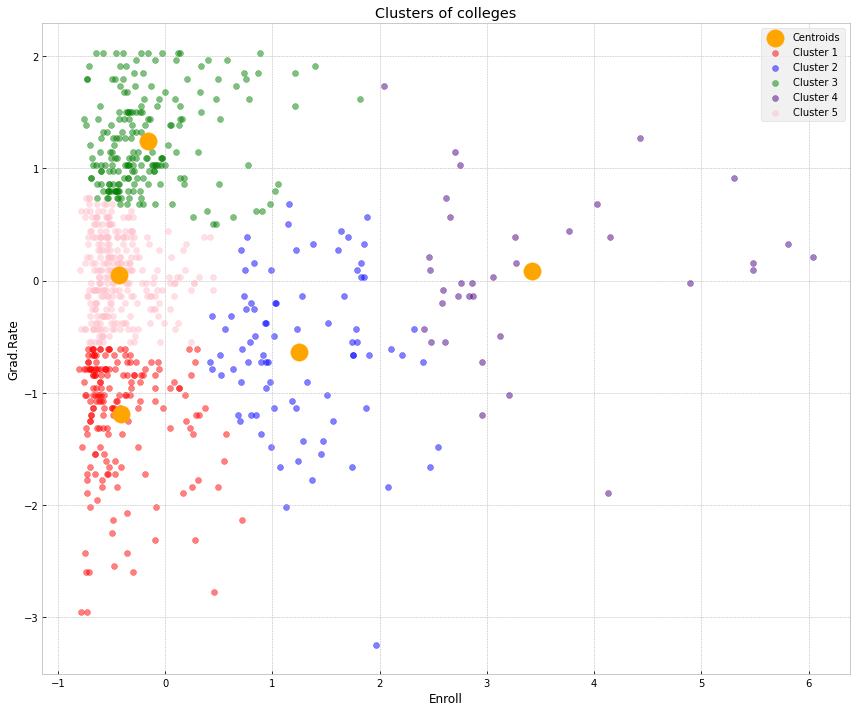

In [20]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(kmeansmodel_unsup.cluster_centers_[:, 0], kmeansmodel_unsup.cluster_centers_[:, 1], s = 300, c = 'orange', zorder = 5, \
            label = 'Centroids', alpha = 1)
plt.scatter(X_scaled[y_kmeans_unsup == 0, 0], X_scaled[y_kmeans_unsup == 0, 1] , c = 'red', label = 'Cluster 1', zorder = 0,\
            alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 1, 0], X_scaled[y_kmeans_unsup == 1, 1], c = 'blue', label = 'Cluster 2', zorder = 1,\
           alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 2, 0], X_scaled[y_kmeans_unsup == 2, 1], c = 'green', label = 'Cluster 3', zorder = 2,\
           alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 3, 0], X_scaled[y_kmeans_unsup == 3, 1], c = 'indigo', label = 'Cluster 4', zorder = 3,\
       alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 4, 0], X_scaled[y_kmeans_unsup == 4, 1], c = 'pink', label = 'Cluster 5', zorder = 4,\
       alpha = .5)

plt.title('Clusters of colleges')
plt.xlabel('Enroll')
plt.ylabel('Grad.Rate')
plt.legend()
plt.tight_layout()
plt.savefig('clusters_2f_4c.png', facecolor='w')
plt.show()

In [ ]:
# Getting counts
dataset2["Kmean_cluster"] = y_kmeans_unsup
dataset2.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(\
            count=pd.NamedAgg(column="college_name", aggfunc="count"))

In [ ]:
cluster_count_df = dataset2["Kmean_cluster"].value_counts().to_frame()
cluster_count_df.reset_index(inplace= True)
cluster_count_df.rename(columns = {"index" : "Kmean_cluster", "Kmean_cluster" : "count"}, inplace = True)
cluster_count_df.sort_values("Kmean_cluster", ignore_index=True, inplace = True)
cluster_count_df

# Modeling using all the variables and 2 clusters

In [21]:
X = dataset.iloc[:, 2:19].values
X

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [2.1860e+03, 1.9240e+03, 5.1200e+02, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [1.4280e+03, 1.0970e+03, 3.3600e+02, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [2.0970e+03, 1.9150e+03, 6.9500e+02, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [1.0705e+04, 2.4530e+03, 1.3170e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [2.9890e+03, 1.8550e+03, 6.9100e+02, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

In [22]:
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
X_scaled

array([[-3.46387711e-01, -3.20323986e-01, -6.38219163e-02, ...,
        -8.67328505e-01, -5.02117275e-01, -3.16018711e-01],
       [-2.10473291e-01, -3.79427213e-02, -2.88763103e-01, ...,
        -5.44524227e-01,  1.65533536e-01, -5.50296733e-01],
       [-4.06334756e-01, -3.75412817e-01, -4.78187261e-01, ...,
         5.85290747e-01, -1.77676519e-01, -6.67435744e-01],
       ...,
       [-2.33470218e-01, -4.16153100e-02, -9.18050305e-02, ...,
        -2.21719949e-01, -2.56584188e-01, -9.60283272e-01],
       [ 1.99077186e+00,  1.77923882e-01,  5.77637163e-01, ...,
         2.11861107e+00,  5.88423278e+00,  1.96819201e+00],
       [-2.98416623e-03, -6.60992347e-02, -9.61101250e-02, ...,
         4.23888608e-01, -9.87054697e-01,  1.96819201e+00]])

In [23]:
# unsupervised learning
kmeansmodel_unsup = KMeans(n_clusters= 2, random_state=31)
y_kmeans_unsup= kmeansmodel_unsup.fit_predict(X_scaled)

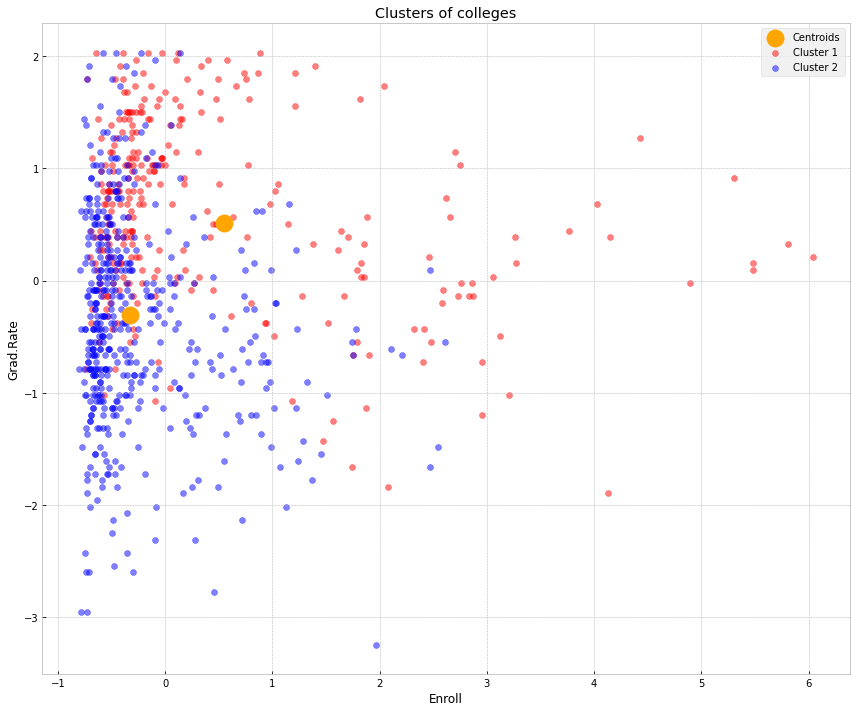

In [24]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(kmeansmodel_unsup.cluster_centers_[:, 0], kmeansmodel_unsup.cluster_centers_[:, 1], s = 300, c = 'orange', zorder = 4, \
            label = 'Centroids', alpha = 1)
plt.scatter(X_scaled[y_kmeans_unsup == 0, 2], X_scaled[y_kmeans_unsup == 0, 16] , c = 'red', label = 'Cluster 1', zorder = 0,\
            alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 1, 2], X_scaled[y_kmeans_unsup == 1, 16], c = 'blue', label = 'Cluster 2', zorder = 1,\
           alpha = .5)
plt.title('Clusters of colleges')
plt.xlabel('Enroll')
plt.ylabel('Grad.Rate')
plt.legend()
plt.tight_layout()
plt.savefig('clusters_all_2c.png', facecolor='w')
plt.show()

## Model Evaluation for all features with 2 clusters

In [ ]:
# Getting counts
dataset3["Kmean_cluster"] = y_kmeans_unsup
dataset3.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(\
            count=pd.NamedAgg(column="college_name", aggfunc="count"))

In [ ]:
cluster_count_df = dataset3["Kmean_cluster"].value_counts().to_frame()
cluster_count_df.reset_index(inplace= True)
cluster_count_df.rename(columns = {"index" : "Kmean_cluster", "Kmean_cluster" : "count"}, inplace = True)
cluster_count_df.sort_values("Kmean_cluster", ignore_index=True, inplace = True)
cluster_count_df

In [ ]:
print(confusion_matrix(dataset3['Cluster'], y_kmeans_unsup))

In [ ]:
print(classification_report(dataset3['Cluster'], y_kmeans_unsup))

## Feature selection for the model - 2 features 2 clusters

In [25]:
X = dataset[['Enroll', 'Grad.Rate']].values
X

array([[ 721,   60],
       [ 512,   56],
       [ 336,   54],
       ...,
       [ 695,   49],
       [1317,   99],
       [ 691,   99]], dtype=int64)

In [26]:
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)
X_scaled

array([[-0.06382192, -0.31601871],
       [-0.2887631 , -0.55029673],
       [-0.47818726, -0.66743574],
       ...,
       [-0.09180503, -0.96028327],
       [ 0.57763716,  1.96819201],
       [-0.09611012,  1.96819201]])

In [27]:
# unsupervised learning
kmeansmodel_unsup = KMeans(n_clusters= 2, random_state=31)
y_kmeans_unsup= kmeansmodel_unsup.fit_predict(X_scaled)

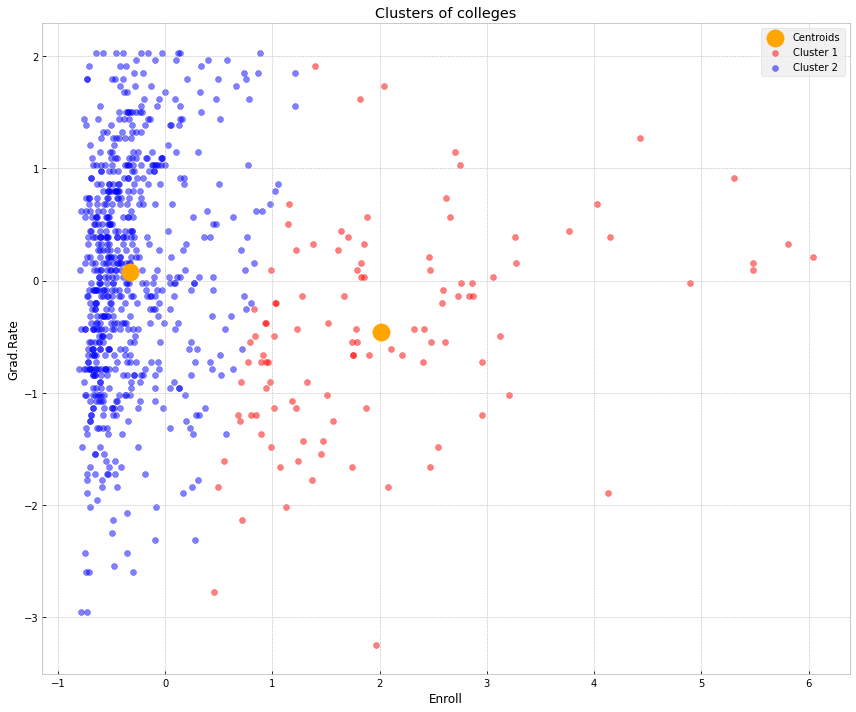

In [28]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(kmeansmodel_unsup.cluster_centers_[:, 0], kmeansmodel_unsup.cluster_centers_[:, 1], s = 300, c = 'orange', zorder = 4, \
            label = 'Centroids', alpha = 1)
plt.scatter(X_scaled[y_kmeans_unsup == 0, 0], X_scaled[y_kmeans_unsup == 0, 1] , c = 'red', label = 'Cluster 1', zorder = 0,\
            alpha = .5)
plt.scatter(X_scaled[y_kmeans_unsup == 1, 0], X_scaled[y_kmeans_unsup == 1, 1], c = 'blue', label = 'Cluster 2', zorder = 1,\
           alpha = .5)
plt.title('Clusters of colleges')
plt.xlabel('Enroll')
plt.ylabel('Grad.Rate')
plt.legend()
plt.tight_layout()
plt.savefig('clusters_2f_2c.png', facecolor='w')
plt.show()

## Model Evaluation for 2 features with 2 clusters

In [ ]:
# Getting counts
dataset4["Kmean_cluster"] = y_kmeans_unsup
dataset4.groupby(["Private", "Cluster", "Kmean_cluster"], as_index = False).agg(\
            count=pd.NamedAgg(column="college_name", aggfunc="count"))

In [ ]:
cluster_count_df = dataset4["Kmean_cluster"].value_counts().to_frame()
cluster_count_df.reset_index(inplace= True)
cluster_count_df.rename(columns = {"index" : "Kmean_cluster", "Kmean_cluster" : "count"}, inplace = True)
cluster_count_df.sort_values("Kmean_cluster", ignore_index=True, inplace = True)
cluster_count_df

In [ ]:
print(confusion_matrix(dataset4['Cluster'], y_kmeans_unsup))

In [ ]:
print(classification_report(dataset4['Cluster'], y_kmeans_unsup))

In [ ]:
import pandas_profiling as pp
# Perform data profiling
profile_report = pp.ProfileReport(dataset)
profile_report.to_file('college_eda.html')
profile_report